## 1. Load libraries

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
from plotly import tools
from plotly.graph_objs import *
import collections
import calendar
%matplotlib inline 
import datetime
import colorlover as cl
import joypy
from matplotlib import cm
import plotnine as pln
from matplotlib.colors import ListedColormap
import matplotlib


plt.style.use('ggplot')
plt.figure(figsize=(18,10))

import seaborn as sns
import os
import folium
from folium.plugins import MarkerCluster
print(folium.__version__)
cmap = ListedColormap(sns.color_palette())

import colorlover as cl
from IPython.display import HTML

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelEncoder
import ggplot
from ggplot import *
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
# plotly.tools.set_credentials_file(username='adslwang4601', api_key='RNtOcvlYrBgpU80Tiiuf')


0.5.0


## 2. Load data

In [2]:
path = '../data/'
# 训练集
train = pd.read_table(path+'round1_ijcai_18_train_20180301.txt',encoding='utf8',delim_whitespace=True)
train['isTrain'] = 1
    
# 测试集
test = pd.read_table(path+'round1_ijcai_18_test_a_20180301.txt',encoding='utf8',delim_whitespace=True)
test['isTrain'] = 0
        
# 连接
df = pd.concat([train, test])
print("========> Load Data Success!") 

========> Load Data Success!


In [6]:
print(len(np.unique(test.instance_id)))
print(test.shape)

18371
(18371, 27)


## 3. Glimpse at the dataset

### 3.1 Train

In [4]:
train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,isTrain
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,1
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,1
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,1
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,1
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0,1


### 3.2 Test

In [5]:
test.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,isTrain
0,2475218615076601065,2275895163219263378,7908382889764677758;8277336076276184272,2636395404473730413;7515802706813700848;302719...,7838285046767229711,7534238860363577544,7,6,8,14,...,4005,8277336076276184272:-1;5799347067982556520:-1;...,5275548996133547595,13,0.985244,5011,0.964023,0.966550,0.955378,0
1,398316874173557226,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,4001,"5755694407684602296:216555019471416386,2636395...",329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134,0
2,6586402638209028583,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,4011,5755694407684602296:2636395404473730413;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134,0
3,1040996105851528465,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,4001,8710739180200009128:-1;5755694407684602296:263...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134,0
4,6316278569655873454,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,4001,5755694407684602296:5131280576272319091;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134,0


### 3.3 Missing values

In [6]:
train.isnull().sum()

instance_id                  0
item_id                      0
item_category_list           0
item_property_list           0
item_brand_id                0
item_city_id                 0
item_price_level             0
item_sales_level             0
item_collected_level         0
item_pv_level                0
user_id                      0
user_gender_id               0
user_age_level               0
user_occupation_id           0
user_star_level              0
context_id                   0
context_timestamp            0
context_page_id              0
predict_category_property    0
shop_id                      0
shop_review_num_level        0
shop_review_positive_rate    0
shop_star_level              0
shop_score_service           0
shop_score_delivery          0
shop_score_description       0
is_trade                     0
isTrain                      0
dtype: int64

### 3.4 File info

In [7]:
rows_train = train.shape[0]
print('Number of rows in the train set: %d' % rows_train)
size_train = os.path.getsize(path+'train.data')/(1024*1024)
print('Train set file size: %d MB' % size_train)
rows_test= test.shape[0]
print('Number of rows in the test set: %d' % rows_test)
size_test = os.path.getsize(path+'test.data')/(1024*1024)
print('Test set file size: %d MB' % size_test)

Number of rows in the train set: 478138
Train set file size: 529 MB
Number of rows in the test set: 18371
Test set file size: 20 MB


### 3.5 Unique counts

In [8]:
train.nunique()

instance_id                  478087
item_id                       10075
item_category_list               14
item_property_list            10908
item_brand_id                  2055
item_city_id                    128
item_price_level                 14
item_sales_level                 18
item_collected_level             18
item_pv_level                    22
user_id                      197694
user_gender_id                    4
user_age_level                    9
user_occupation_id                5
user_star_level                  12
context_id                   478111
context_timestamp            281824
context_page_id                  20
predict_category_property     78796
shop_id                        3959
shop_review_num_level            25
shop_review_positive_rate     11825
shop_star_level                  22
shop_score_service            16361
shop_score_delivery           16423
shop_score_description        16463
is_trade                          2
isTrain                     

In [10]:
(train.user_id.value_counts()==1).sum()/len(train.user_id.value_counts())

0.4724776675063482

## 4. Features visualization
Here we have a first look at the distributions of the features in our individual data files before combining them for a more detailed analysis. This visualization will be the foundation on which we build our analysis.

### 4.1 The information of advertising  products

### 4.1.1 item_id
It seems that view count has no correlation with trade_rate. As shown in Figure2, numbers of most items are less 500. 

Text(0,0.5,'count')

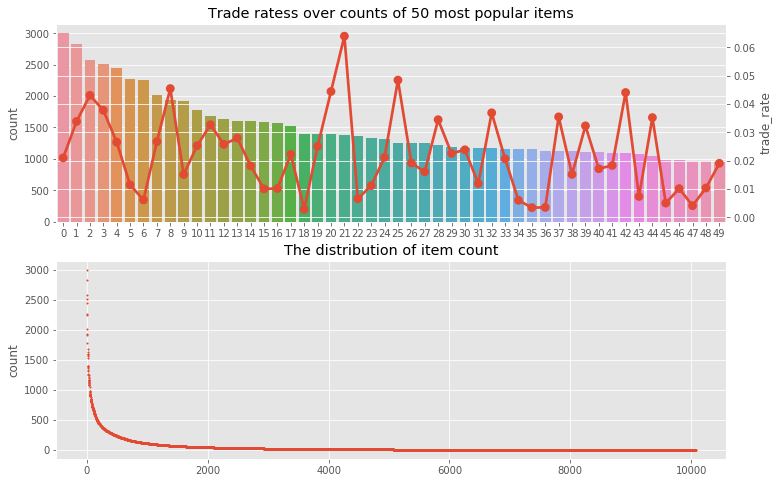

In [5]:
item_data = train[['item_id', 'item_category_list', 'item_property_list', 'item_brand_id', 'item_city_id', \
                  'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'is_trade']]
item_count = item_data['item_id'].value_counts()[:50].reset_index()
item_count.columns = ['item_id', 'count']

top_50_data = item_data.merge(item_count, on=['item_id'])
popular = top_50_data.groupby(by=['item_id']).is_trade.agg(['mean']).reset_index()
popular.columns = ['item_id', 'trade_rate']
merge_count = item_count.merge(popular, on=['item_id'])

fig, axes = plt.subplots(2, 1, figsize=(12,8))
ax_y = axes[0].twinx()
sns.barplot(x = list(range(item_count.shape[0])), y=merge_count['count'], ax=axes[0])
sns.pointplot(x = list(range(item_count.shape[0])), y=merge_count['trade_rate'], ax=ax_y)
axes[0].set_title('Trade ratess over counts of 50 most popular items')

axes[1].scatter(x=list(range(item_data['item_id'].value_counts().shape[0])), \
                y=item_data['item_id'].value_counts().values, s=2)
axes[1].set_title('The distribution of item count')
axes[1].set_ylabel('count')



## 4.1.2 item_category_list

In [10]:
def stack_bar(column, num_categories):
    le = LabelEncoder()
    item_data[column] = le.fit_transform(item_data[column])
    item_data[column] = item_data[column].apply(lambda x: '%s_' %column +str(x))
    item_data_subset = item_data[column].value_counts()[:num_categories].reset_index()
    item_data_subset.columns = ['%s' % column, '%s_count' % column]

    item_data_subset = item_data_subset.merge(item_data, how='inner', on=column)
    count_cate1 = item_data_subset[item_data_subset['is_trade']==1][column].value_counts().sort_index()
    count_cate0 = item_data_subset[item_data_subset['is_trade']==0][column].value_counts().sort_index()
    
    
    trace1 = go.Bar(
        x=count_cate0.index,
        y=count_cate0.values,
        name='is_trade==0'
    )
    trace2 = go.Bar(
        x=count_cate1.index,
        y=count_cate1.values,
        name='is_trade==1'
    )

    data = [trace1, trace2]
    layout = go.Layout(
        barmode='stack'
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

In [11]:
item_data['item_category_list']
for i in range(3):
        item_data['category_%d' % (i)] = item_data['item_category_list'].apply(
            lambda x: str(x).split(";")[i] if len(str(x).split(";")) > i else " "
        )

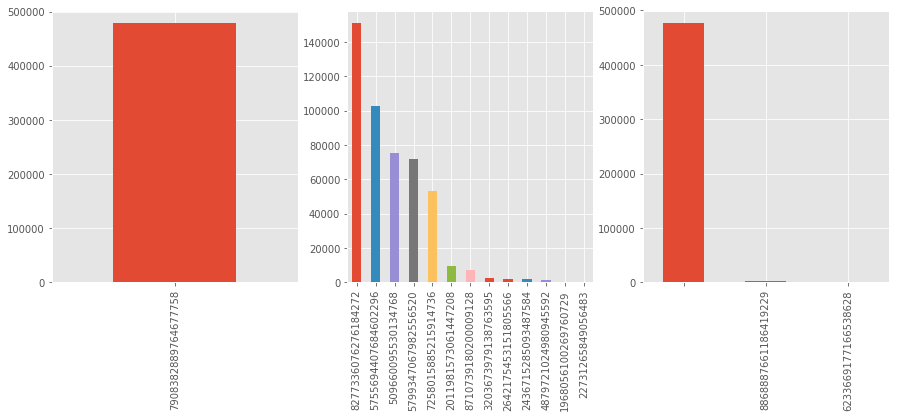

In [12]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
item_data['category_0'].value_counts().plot.bar(ax=ax1)
ax2 = fig.add_subplot(1,3,2)
item_data['category_1'].value_counts().plot.bar(ax=ax2)
ax3 = fig.add_subplot(1,3,3)
item_data['category_2'].value_counts().plot.bar(ax=ax3)

In [13]:
le = LabelEncoder()
item_data['category_1'] = le.fit_transform(item_data['category_1'])
count_cate1 = item_data[item_data['is_trade']==1]['category_1'].value_counts().sort_index()
count_cate0 = item_data[item_data['is_trade']==0]['category_1'].value_counts().sort_index()
trace1 = go.Bar(
    x=count_cate0.index,
    y=count_cate0.values,
    name='is_trade==0'
)
trace2 = go.Bar(
    x=count_cate1.index,
    y=count_cate1.values,
    name='is_trade==1'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

### 4.1.3 item_brand_id

In [14]:
column = 'item_brand_id'
fig = stack_bar(column, 15)
iplot(fig, filename='stacked-%s_bar' % column)

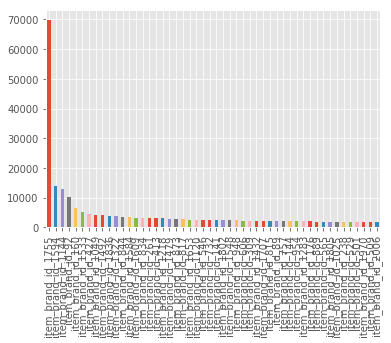

In [15]:
item_data['item_brand_id'].value_counts()[:50].plot.bar()

### 4.1.4 item_city_id

In [16]:
column = 'item_city_id'
fig = stack_bar(column, 50)
iplot(fig, filename='stacked-%s_bar' % column)

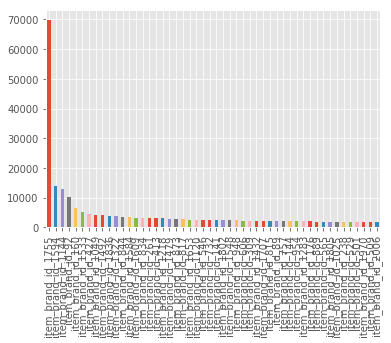

In [17]:
item_data['item_brand_id'].value_counts()[:50].plot.bar()

### 4.1.5 item_price_level

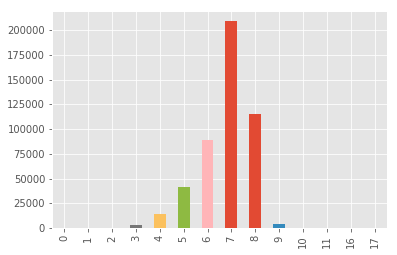

In [18]:
item_data['item_price_level'].value_counts(sort=False).plot.bar()

In [19]:
item_data['item_price_level'].value_counts()

7     209285
8     115587
6      89057
5      41057
4      14607
9       4035
3       3587
10       456
2        347
1         85
11        21
0         12
17         1
16         1
Name: item_price_level, dtype: int64

### 4.1.6 item_sales_level 销量等级

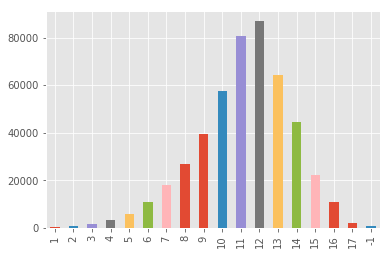

In [20]:
item_data['item_sales_level'].value_counts(sort=False).plot.bar()

In [21]:
item_data['item_sales_level'].value_counts()

 12    86960
 11    80440
 13    64451
 10    57664
 14    44525
 9     39638
 8     26969
 15    22199
 7     18030
 16    11096
 6     11034
 5      5739
 4      3230
 17     1955
 3      1844
 2       950
-1       913
 1       501
Name: item_sales_level, dtype: int64

### 4.1.7 item_collected_level 广告商品被收藏次数的等级

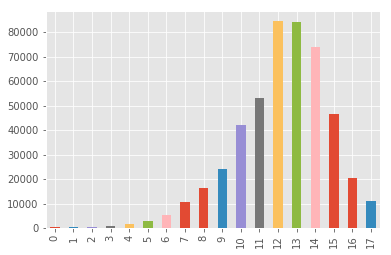

In [22]:
item_data['item_collected_level'].value_counts(sort=False).plot.bar()

In [23]:
item_data['item_collected_level'].value_counts()

12    84601
13    84050
14    73771
11    53010
15    46410
10    42053
9     23999
16    20403
8     16443
17    11071
7     10438
6      5372
5      2804
4      1736
3       939
2       492
0       279
1       267
Name: item_collected_level, dtype: int64

### 4.1.8 item_pv_level 广告商品被展示次数的等级

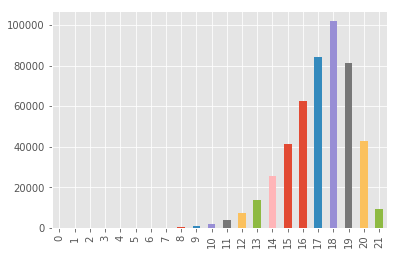

In [24]:
item_data['item_pv_level'].value_counts(sort=False).plot.bar()

###  item_property_list  try TF-IDF

In [1]:
countvector.sum(axis=0, ascending=False)[:50]

NameError: name 'countvector' is not defined

In [88]:
pror_count = np.array(countvector.sum(axis=0))[0]
count = pd.Series(data = pror_count, index = np.arange(0, len(pror_count)))
selected_index = list(count.sort_values(ascending=False)[:100].index)
column_name = np.array(vectorizer.get_feature_names())[selected_index]
column_value = countvector[:, selected_index]
pd.DataFrame(column_value.toarray(), columns=column_name)

,2636395404473730413,5131280576272319091,9148482949976129397,6491818071284064879,1243768796732904674,4678095570925618478,2033679869864207699,7344985833148694227,2865114645280905956,1761412768692736998,...,2543995460448955001,7839592306500064003,4604184749617479504,2302854195654097523,8190913615004050276,5977512434884267894,5195139481388729954,7312071789625332753,3831698877599682071,2204139916386380313
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
a = np.array([1, 2, 3])
a[[2, 0, 1]]

array([3, 1, 2])

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
corpus = train.item_property_list.values.astype('U').tolist()
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
countvector = vectorizer.transform(train.item_property_list)

# transformer = TfidfTransformer()
# tf = transformer.fit_transform(countvector)
# x = np.mean(tf,1)
# item_data['property_list_tfidf'] = (x - np.min(x)) / (np.max(x) - np.min(x))

KeyboardInterrupt: 

In [6]:
item_data['property_list_tfidf']

NameError: name 'item_data' is not defined

### 相关性分析

In [27]:
sp.stats.pearsonr(item_data['item_pv_level'].values,item_data['item_collected_level'].values)

(0.6721203405366242, 0.0)

In [28]:
sp.stats.pearsonr(item_data['item_pv_level'].values,item_data['item_sales_level'].values)

(0.7576972548596825, 0.0)

In [29]:
sp.stats.pearsonr(item_data['item_sales_level'].values,item_data['item_price_level'].values)

(-0.029377090345582738, 8.938511655123964e-92)

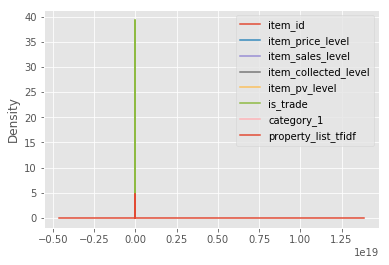

In [30]:
# train.boxplot()
# item_data.plot(kind='density')
# plt.hist(item_data['item_pv_level'], bins = 10, range =(item_data['item_pv_level'].min(),item_data['item_pv_level'].max()))
# item_data.item_pv_level.value_counts(sort=False).plot(kind='bar', figsize=(8,10))

### 4.2 用户user分析

In [31]:
# imp = Imputer(missing_values='-1', strategy='mean', axis=0)
# df = df.fit_transform(df)
user_columns = ['user_id', 'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 'is_trade']
user_data = df[user_columns]

In [32]:
user_data.nunique()

user_id               207641
user_gender_id             4
user_age_level             9
user_occupation_id         5
user_star_level           12
is_trade                   2
dtype: int64

### 4.2.1 user_gender_id

In [33]:
user_data['user_gender_id'][user_data['user_gender_id']==-1] = user_data['user_gender_id'].mode().values[0]
user_data['user_gender_id'].value_counts()

0    387964
1     97794
2     10751
Name: user_gender_id, dtype: int64

### 4.2.2 user_age_level

 1003    175939
 1004    131139
 1002     72838
 1005     58767
 1006     31254
 1000     13501
 1001      6666
 1007      5423
-1          982
Name: user_age_level, dtype: int64

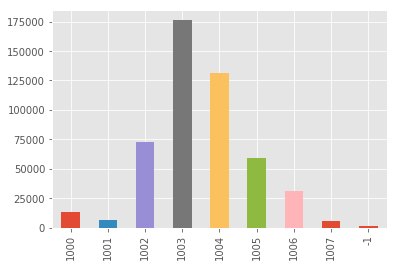

In [34]:
# user_data['user_age_level'][user_data['user_age_level']==-1] = 
user_data['user_age_level'].value_counts(sort=False).plot.bar()
user_data['user_age_level'].value_counts()

### 4.2.3 user_star_level

 3006    85132
 3003    77450
 3005    70044
 3002    65338
 3004    64165
 3007    55356
 3000    32554
 3008    20977
 3001    20031
 3009     4299
-1         982
 3010      181
Name: user_star_level, dtype: int64

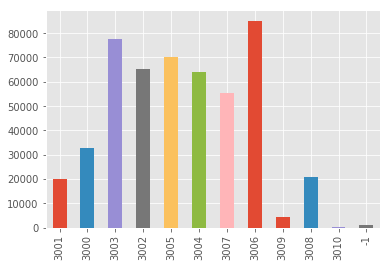

In [35]:
user_data['user_star_level'].value_counts(sort=False).plot.bar()
user_data['user_star_level'].value_counts()

### 4.2.4 user_occupation_id

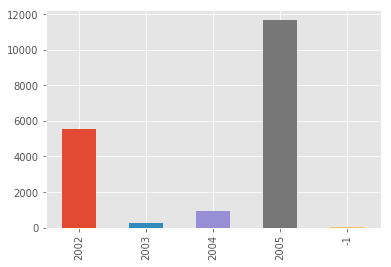

In [36]:
test['user_occupation_id'].value_counts()
test['user_occupation_id'].value_counts(sort=False).plot.bar()

### 4.2.4 user_id

In [37]:
test['user_id'].count()

18371

### 4.3 shop分析

In [38]:
shop_data_column = ['shop_id', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 
                  'shop_score_service','shop_score_delivery', 'shop_score_description','is_trade']
shop_data = train[shop_data_column]

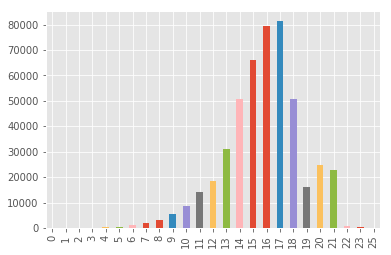

In [39]:
shop_data['shop_review_num_level'].value_counts(sort=False).plot.bar()

### 4.3.1 每个shop被view的次数count

In [40]:
shop_instance_count = shop_data.groupby(['shop_id']).size().reset_index().rename(columns={0:'shop_instance_count'})
shop_data = pd.merge(shop_data, shop_instance_count, 'left', on='shop_id')

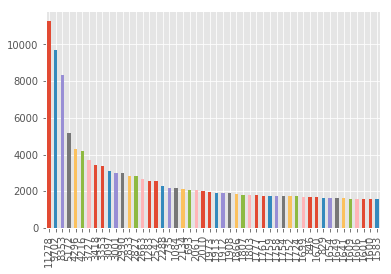

In [41]:
shop_data['shop_instance_count'].value_counts()[:50].plot.bar()

In [42]:
shop_data.count()

shop_id                      478138
shop_review_num_level        478138
shop_review_positive_rate    478138
shop_star_level              478138
shop_score_service           478138
shop_score_delivery          478138
shop_score_description       478138
is_trade                     478138
shop_instance_count          478138
dtype: int64

### 4.3.2 shop_review_num_level

17    81437
16    79295
15    65954
14    50727
18    50617
13    31051
20    24914
21    22855
12    18673
19    16230
11    14008
10     8598
9      5484
8      3089
7      1849
6      1343
22      619
5       578
23      353
4       266
2        87
3        80
1        20
0         7
25        4
Name: shop_review_num_level, dtype: int64

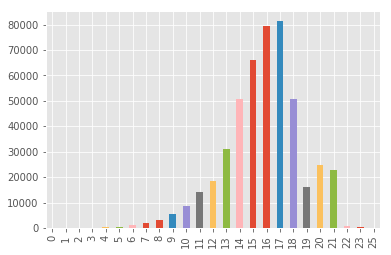

In [43]:
shop_data['shop_review_num_level'].value_counts(sort=False).plot.bar()
shop_data['shop_review_num_level'].value_counts()

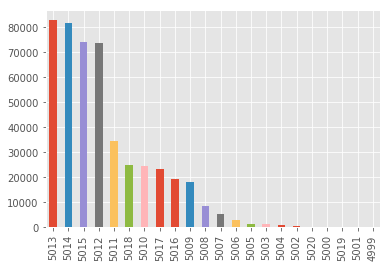

In [44]:
shop_data['shop_star_level'].value_counts()
shop_data['shop_star_level'].value_counts().plot.bar()

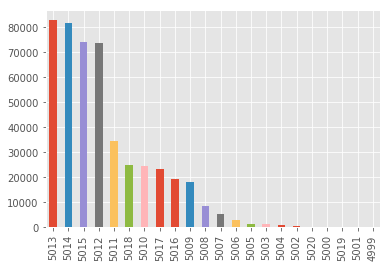

In [45]:
'shop_review_positive_rate','shop_score_service','shop_score_delivery', 'shop_score_description'
shop_data['shop_star_level'].value_counts()
shop_data['shop_star_level'].value_counts().plot.bar()

In [46]:
shop_data['shop_review_positive_rate'].count()
# shop_data['shop_review_positive_rate'][shop_data['shop_review_positive_rate']<0.98].count()

478138

### visualize correlations using heatmap

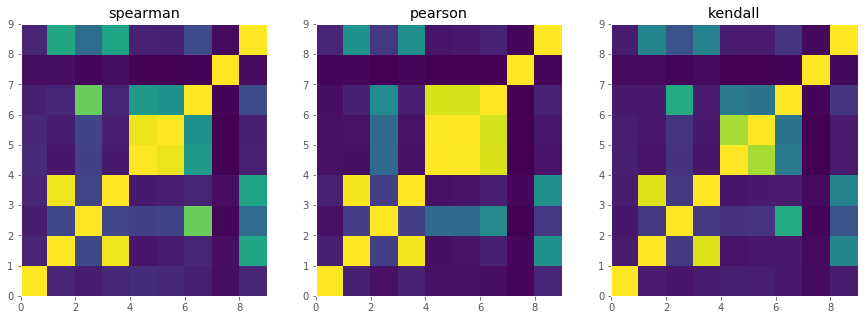

In [47]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
corMat = pd.DataFrame(shop_data.corr(method='spearman'))
plt.title('spearman')
plt.pcolor(corMat)
ax2 = fig.add_subplot(1,3,2)
corMat = pd.DataFrame(shop_data.corr(method='pearson'))
plt.title('pearson')
plt.pcolor(corMat)
ax3 = fig.add_subplot(1,3,3)
corMat = pd.DataFrame(shop_data.corr(method='kendall'), columns=shop_data.columns.values.tolist())
plt.title('kendall')
plt.pcolor(corMat)

In [48]:
shop_data.columns.values.tolist()

[u'shop_id',
 u'shop_review_num_level',
 u'shop_review_positive_rate',
 u'shop_star_level',
 u'shop_score_service',
 u'shop_score_delivery',
 u'shop_score_description',
 u'is_trade',
 'shop_instance_count']

In [49]:
train.columns.values

array([u'instance_id', u'item_id', u'item_category_list',
       u'item_property_list', u'item_brand_id', u'item_city_id',
       u'item_price_level', u'item_sales_level', u'item_collected_level',
       u'item_pv_level', u'user_id', u'user_gender_id', u'user_age_level',
       u'user_occupation_id', u'user_star_level', u'context_id',
       u'context_timestamp', u'context_page_id',
       u'predict_category_property', u'shop_id', u'shop_review_num_level',
       u'shop_review_positive_rate', u'shop_star_level',
       u'shop_score_service', u'shop_score_delivery',
       u'shop_score_description', u'is_trade', 'isTrain'], dtype=object)

### 4.4 context

In [50]:
context_columns = ['context_id', 'context_timestamp', 'context_page_id', 'predict_category_property']
context = train[context_columns]

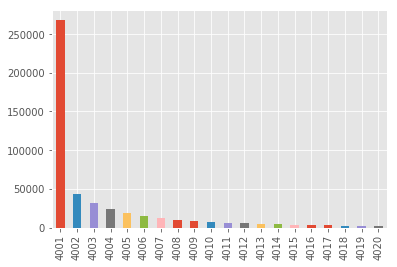

In [51]:
context['context_page_id'].value_counts().plot.bar()

In [57]:
def date_convert(data):
    # Transform into datetime format
    data['time'] = pd.to_datetime(data.context_timestamp, unit='s')
    
    # transform into Beijing datetime format
    data['realtime'] = data['time'].apply(lambda x: x + datetime.timedelta(hours=8))
    data['day'] = data['realtime'].dt.day
    data['hour'] = data['realtime'].dt.hour
    
    return data

In [58]:
context=date_convert(context)

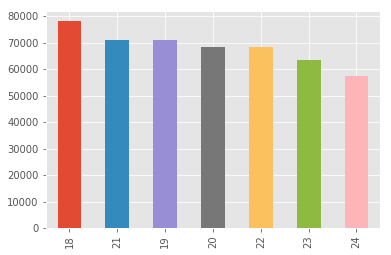

In [61]:
context.day.value_counts().plot.bar()

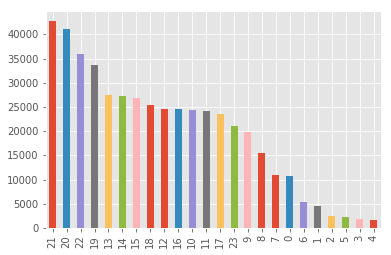

In [62]:
context.hour.value_counts().plot.bar()

In [101]:
def process_category_property(x):
    category = []
    for i in x.split(';'):
        category.append(i.split(':')[0])
    return ';'.join(set(category))
predict_category_property_count = predict_category_property.apply(process_category_property
)

In [105]:
# predict_category_property_count.value_counts()

In [106]:
# predict_category_property.values